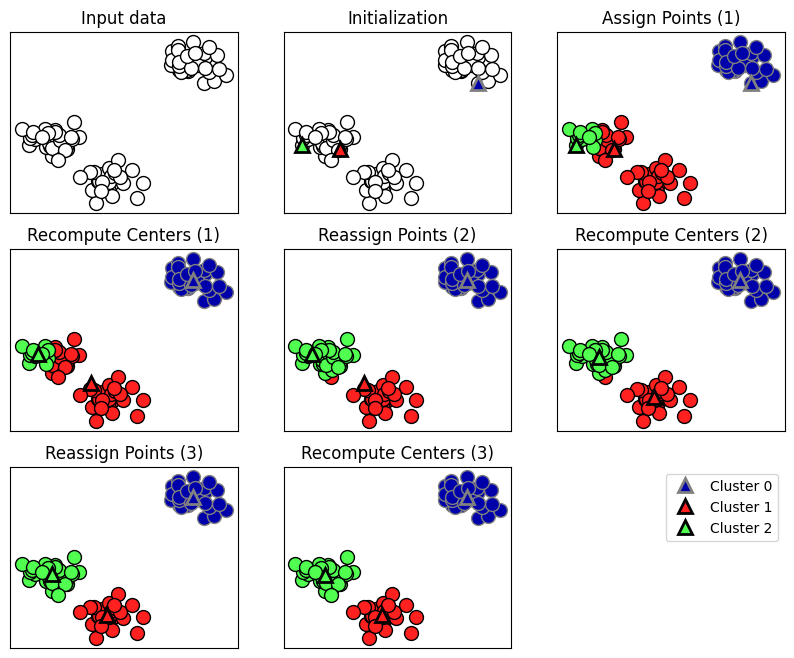

In [2]:
%matplotlib inline
# L'algo en k-moyenne essaye de trouver des centres de cluster pour des régions de données.
# Déroulé : 
# - affecter chaque point au centre le plus proche
# - définir chaque centre comme la moyenne des points qui lui sont affectées
# - recommence jusque convergence atteinte
import mglearn
mglearn.plots.plot_kmeans_algorithm()

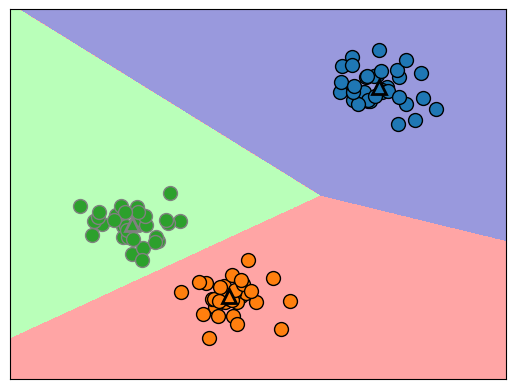

In [4]:
# Pour chaque nouveau point de donnée, celui-ci va être assigné au centre du cluster le plus proche
mglearn.plots.plot_kmeans_boundaries()

# Dessin de la surface d'assignation

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

print(X.shape)

(100, 2)


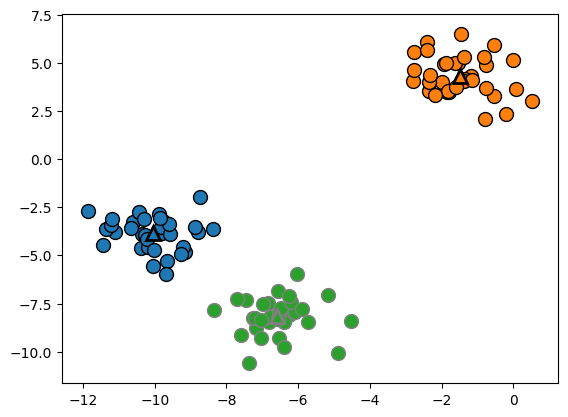

In [10]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],[0,1,2],
                        markers='^', markeredgewidth=2)
# L'algo est aveugle et se contente de construire des bin
# On obtient autant de clusters que ce qu'on demande

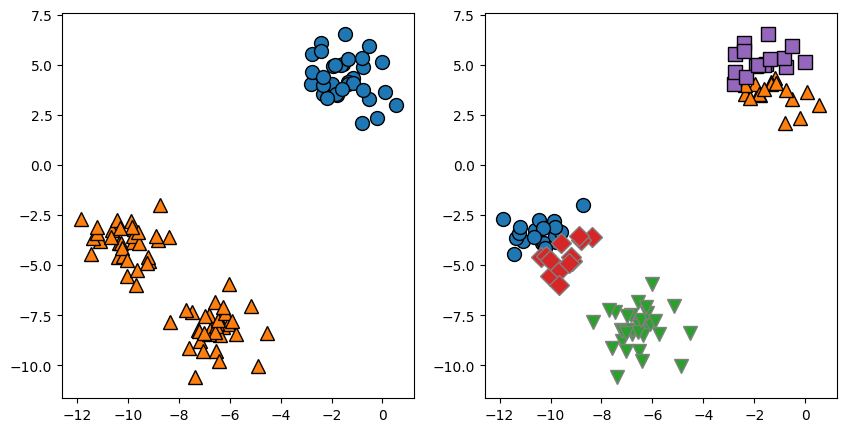

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(10,5))

kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

kmeans = KMeans(n_clusters=5,n_init=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

# Il est donc difficile de trouver un sens particulier aux clusters

Text(0, 0.5, 'Paramètre 2')

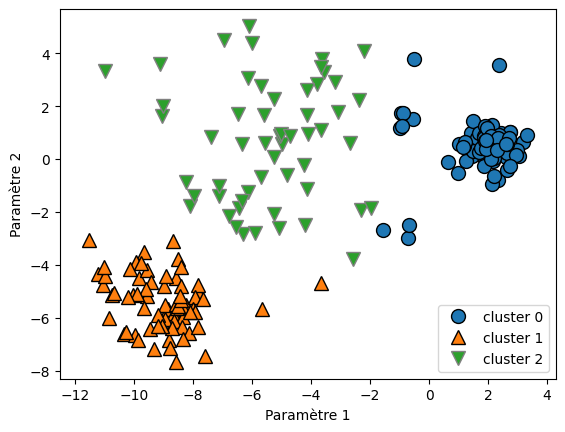

In [21]:
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0,2.5,0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3,n_init=10, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"])
plt.xlabel("Paramètre 1")
plt.ylabel("Paramètre 2")

# Même en connaissant le bon nombre de cluster, on peut avoir un partitionnement exotique : par définition 
# les clusters doivent être simple ( convexité des clusters )

Text(0, 0.5, 'Paramètre 2')

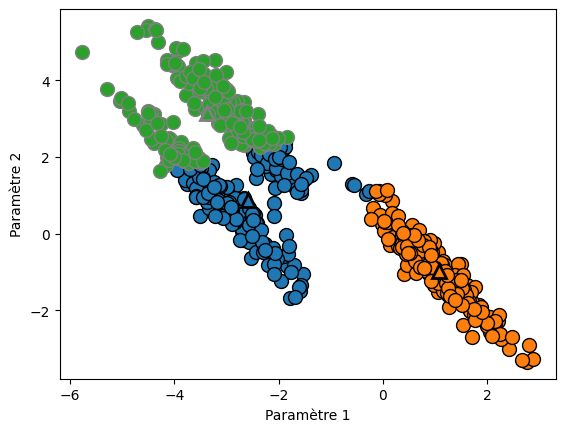

In [23]:
import numpy as np

X,y = make_blobs(random_state=170,n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],[0,1,2],
                        markers='^', markeredgewidth=2)
plt.xlabel("Paramètre 1")
plt.ylabel("Paramètre 2")

Text(0, 0.5, 'Paramètre 2')

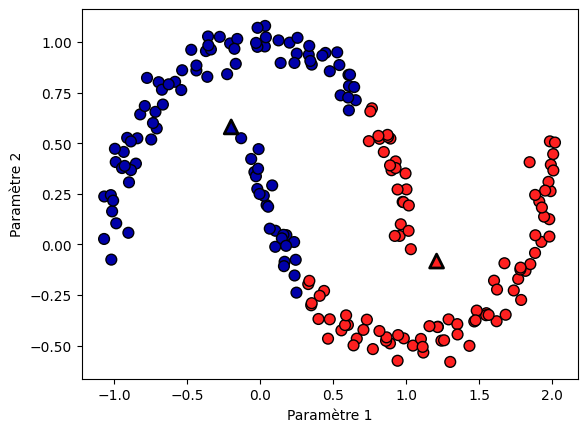

In [29]:
from sklearn.datasets import make_moons

X,y = make_moons(random_state=0,n_samples=200,noise=0.05)

kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolor='k')
plt.xlabel("Paramètre 1")
plt.ylabel("Paramètre 2")

# Pour des clusters complexes : 